# **Classical Algorithm: Lasso Regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:

# 1. Mount the dataset
# Load the dataset
dataset_path = '/content/drive/MyDrive/MiniProject_BlackHoleMassEstimation/typeII_AGN_metadata.csv'
data = pd.read_csv(dataset_path)

In [ ]:
# 2. Target Column and Features
target_column = 'log_bh_mass'
features = [
    'h_beta_flux', 'h_beta_flux_err', 'oiii_5007_flux', 'oiii_5007_flux_err',
    'h_alpha_flux', 'h_alpha_flux_err', 'nii_6584_flux', 'nii_6584_flux_err',
    'log_stellar_sigma', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
    'psfMag_z', 'psfMagErr_u', 'psfMagErr_g', 'psfMagErr_r', 'psfMagErr_i',
    'psfMagErr_z', 'mendel_logM_p50', 'mendel_logM_p16', 'mendel_logM_p84',
    'mendel_logMt_p50', 'mendel_logMt_p16', 'mendel_logMt_p84', 'mendel_logMb_p50',
    'mendel_logMb_p16', 'mendel_logMb_p84', 'mendel_logMd_p50', 'mendel_logMd_p16',
    'mendel_logMd_p84', 'simard_b_t_g', 'simard_e_b_t_g', 'simard_b_t_r',
    'simard_e_b_t_r', 'simard_Rhlg', 'simard_Rhlr', 'simard_Rchl_g',
    'simard_Rchl_r', 'simard_Re', 'simard_e_Re', 'simard_e', 'simard_e_e',
    'simard_nb', 'simard_e_nb', 'simard_PpS', 'simard_Pn4'
]

In [ ]:
# 3. Handling Missing/NaN Values
data.fillna(data.mean(), inplace=True)

# Separate features and target
X = data[features]
y = data[target_column]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Error Metrics Function
def calculate_error_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    range_y = np.ptp(y_true)  # Range of target values
    accuracy_mae = (1 - mae / range_y) * 100
    accuracy_mse = (1 - mse / range_y) * 100
    accuracy_rmse = (1 - rmse / range_y) * 100

    return mse, rmse, mae, r2, accuracy_mae, accuracy_mse, accuracy_rmse

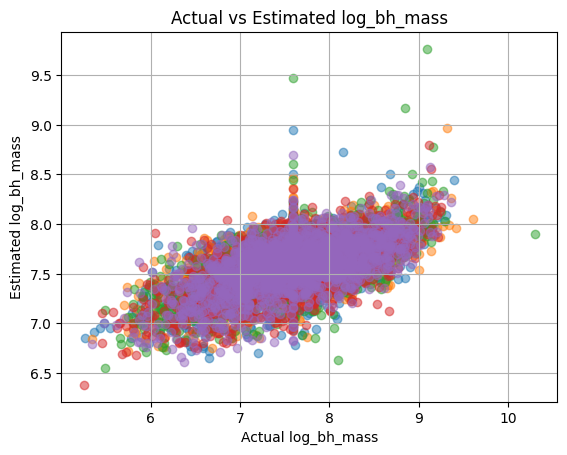

In [ ]:
# 5. Run Lasso Regression with 5-Fold Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_list = []
rmse_list = []
mae_list = []
r2_list = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the Lasso model
    model = Lasso(alpha=0.1)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse, rmse, mae, r2, accuracy_mae, accuracy_mse, accuracy_rmse = calculate_error_metrics(y_test, y_pred)

    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(r2)

    # Plotting
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel('Actual log_bh_mass')
    plt.ylabel('Estimated log_bh_mass')
    plt.title('Actual vs Estimated log_bh_mass')
    plt.grid(True)

plt.show()

In [ ]:
# Define accuracy calculation functions
def calc_accuracy(y_true, y_pred, error_metric):
    range_y = np.ptp(y_true)  # Range of target values
    if error_metric == 'mae':
        mae = mean_absolute_error(y_true, y_pred)
        accuracy = (1 - mae / range_y) * 100
    elif error_metric == 'mse':
        mse = mean_squared_error(y_true, y_pred)
        accuracy = (1 - mse / range_y) * 100
    elif error_metric == 'rmse':
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        accuracy = (1 - rmse / range_y) * 100
    return accuracy

# Calculate accuracy metrics
accuracy_mae = calc_accuracy(y, model.predict(X_scaled), 'mae')
accuracy_mse = calc_accuracy(y, model.predict(X_scaled), 'mse')
accuracy_rmse = calc_accuracy(y, model.predict(X_scaled), 'rmse')


In [ ]:
# Print metrics
print(f"Mean MSE: {np.mean(mse_list)}")
print(f"Mean RMSE: {np.mean(rmse_list)}")
print(f"Mean MAE: {np.mean(mae_list)}")
print(f"Mean R²: {np.mean(r2_list)}")

print(f"Accuracy MAE: {accuracy_mae}%")
print(f"Accuracy MSE: {accuracy_mse}%")
print(f"Accuracy RMSE: {accuracy_rmse}%")

Mean MSE: 0.27736608501570625
Mean RMSE: 0.5266454760916239
Mean MAE: 0.4263455201084326
Mean R²: 0.3152231919722439
Accuracy MAE: 91.53685689428833%
Accuracy MSE: 94.48756447327591%
Accuracy RMSE: 89.54412268999785%
